Hier worden alle libraries geïmporteerd

In [1]:
# importing required libraries

import pandas as pd
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn import tree
import warnings
warnings.simplefilter("ignore")


Hier wordt alle data van de dataset opgehaald

In [2]:
# importing the dataset

result_df = pd.read_csv("./data/results.csv")
stats_df = pd.read_csv("./data/status.csv")
drivers_df = pd.read_csv("./data/drivers.csv")
races_df = pd.read_csv("./data/races.csv")
constructor_df = pd.read_csv("./data/constructors.csv")
driver_standings_df = pd.read_csv("./data/driver_standings.csv")
qualifying_df = pd.read_csv("./data/qualifying.csv")


De data wordt weergegeven om te checken of het ophalen hiervan goed is gegaan

In [3]:
# Viewing the data

result_df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


Alle data wordt samengevoegd tot 1 dataframe en daarna wordt deze weergegeven om te checken of alles goed is gegaan

In [4]:
# merging all seperate dataframe into single dataframe as df

mer1 = pd.merge(result_df, races_df, on='raceId')
mer2 = pd.merge(mer1, drivers_df, on='driverId')
mer3 = pd.merge(mer2, driver_standings_df, on=['driverId', 'raceId'])
mer4 = pd.merge(mer3, constructor_df, on='constructorId')
mer5 = pd.merge(mer4, qualifying_df, on=['raceId', 'driverId'])
df = pd.merge(mer5, stats_df, on=['statusId'])
pd.get_option("display.max_columns", None)

# checking the data types

df.head()


,resultId,raceId,driverId,constructorId_x,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,nationality_y,url,qualifyId,constructorId_y,number,positionQuali,q1,q2,q3,status
0,1,18,1,1,22,1,1,1,1,10.0,...,British,http://en.wikipedia.org/wiki/McLaren,1,1,22,1,1:26.572,1:25.187,1:26.714,Finished
1,27,19,1,1,22,9,5,5,5,4.0,...,British,http://en.wikipedia.org/wiki/McLaren,26,1,22,4,1:35.392,1:34.627,1:36.709,Finished
2,69,21,1,1,22,5,3,3,3,6.0,...,British,http://en.wikipedia.org/wiki/McLaren,71,1,22,5,1:21.366,1:20.825,1:22.096,Finished
3,90,22,1,1,22,3,2,2,2,8.0,...,British,http://en.wikipedia.org/wiki/McLaren,91,1,22,3,1:26.192,1:26.477,1:27.923,Finished
4,109,23,1,1,22,3,1,1,1,10.0,...,British,http://en.wikipedia.org/wiki/McLaren,111,1,22,3,1:15.582,1:15.322,1:15.839,Finished


Er wordt gekeken welke data types er in de dataframe zitten, en hoeveel RAM ze gebruiken

In [5]:
# checking what types of data are in the dataframe and how much ram they take up

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 8880
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           8881 non-null   int64  
 1   raceId             8881 non-null   int64  
 2   driverId           8881 non-null   int64  
 3   constructorId_x    8881 non-null   int64  
 4   number_x           8881 non-null   object 
 5   grid               8881 non-null   int64  
 6   position_x         8881 non-null   object 
 7   positionText_x     8881 non-null   object 
 8   positionOrder      8881 non-null   int64  
 9   points_x           8881 non-null   float64
 10  laps               8881 non-null   int64  
 11  time_x             8881 non-null   object 
 12  milliseconds       8881 non-null   object 
 13  fastestLap         8881 non-null   object 
 14  rank               8881 non-null   object 
 15  fastestLapTime     8881 non-null   object 
 16  fastestLapSpeed    8881 

Alle kollomen die in het dataframe staan worden hier geprint

In [6]:
# viewing the columns in the dataframe

df.columns


Index(['resultId', 'raceId', 'driverId', 'constructorId_x', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name_x',
       'date', 'time_y', 'url_x', 'driverRef', 'number_y', 'code', 'forename',
       'surname', 'dob', 'nationality_x', 'url_y', 'driverStandingsId',
       'points_y', 'position_y', 'positionText_y', 'wins', 'constructorRef',
       'name_y', 'nationality_y', 'url', 'qualifyId', 'constructorId_y',
       'number', 'positionQuali', 'q1', 'q2', 'q3', 'status'],
      dtype='object')

Alle kollomen die geen waardevolle data hebben worden hier gedropt

In [7]:
# dropping unnecessary columns

df = df.drop(['url', 'url_x', 'fastestLapTime', 'positionText_x', 'time_x', 'time_y', 'driverRef', 'constructorRef', 'nationality_y', 'url_y', 'positionText_y', 'points_y', 'rank', 'number_y', 'milliseconds', 'fastestLapSpeed',
             'number_x', 'number', 'code', 'fastestLap', 'driverStandingsId', 'q1', 'q2', 'q3', 'status', 'constructorId_x', 'constructorId_y', 'points_x', 'qualifyId', 'wins', 'resultId', 'positionOrder', 'position_y', 'grid', 'statusId'], axis='columns')


Alle kollomen met onduidelijke namen worden hernoemd naar namen die duidelijk aangeven welke data er in staat

In [8]:
# renaming the column names to less confusing names

col_name = {'name_x': 'grand_prix', 'nationality_x': 'nationality', 'name_y': 'constructor',
            'raceId_x': 'racerId', 'points_x': 'points', 'forename': 'firstname', 'position_x': 'finnishPosition'}

df.rename(columns=col_name, inplace=True)
df.head()


,raceId,driverId,finnishPosition,laps,year,round,circuitId,grand_prix,date,firstname,surname,dob,nationality,constructor,positionQuali
0,18,1,1,58,2008,1,1,Australian Grand Prix,2008-03-16,Lewis,Hamilton,1985-01-07,British,McLaren,1
1,19,1,5,56,2008,2,2,Malaysian Grand Prix,2008-03-23,Lewis,Hamilton,1985-01-07,British,McLaren,4
2,21,1,3,66,2008,4,4,Spanish Grand Prix,2008-04-27,Lewis,Hamilton,1985-01-07,British,McLaren,5
3,22,1,2,58,2008,5,5,Turkish Grand Prix,2008-05-11,Lewis,Hamilton,1985-01-07,British,McLaren,3
4,23,1,1,76,2008,6,6,Monaco Grand Prix,2008-05-25,Lewis,Hamilton,1985-01-07,British,McLaren,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 8880
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   raceId           8881 non-null   int64 
 1   driverId         8881 non-null   int64 
 2   finnishPosition  8881 non-null   object
 3   laps             8881 non-null   int64 
 4   year             8881 non-null   int64 
 5   round            8881 non-null   int64 
 6   circuitId        8881 non-null   int64 
 7   grand_prix       8881 non-null   object
 8   date             8881 non-null   object
 9   firstname        8881 non-null   object
 10  surname          8881 non-null   object
 11  dob              8881 non-null   object
 12  nationality      8881 non-null   object
 13  constructor      8881 non-null   object
 14  positionQuali    8881 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 1.1+ MB


Twee kolommen die los van elkaar overbodige kollomen vormen worden samen gevoegd tot 1 zinvolle en bruikbare kolom

In [10]:
# combining the two columns into one column for better readability

df['driver_name'] = df.pop('firstname')+' '+df.pop('surname')


Er wordt gekeken of het samenvoegen gelukt is

In [11]:
# checking if driver_name is present in the dataframe and that firstname and surname are not present

df.head()


,raceId,driverId,finnishPosition,laps,year,round,circuitId,grand_prix,date,dob,nationality,constructor,positionQuali,driver_name
0,18,1,1,58,2008,1,1,Australian Grand Prix,2008-03-16,1985-01-07,British,McLaren,1,Lewis Hamilton
1,19,1,5,56,2008,2,2,Malaysian Grand Prix,2008-03-23,1985-01-07,British,McLaren,4,Lewis Hamilton
2,21,1,3,66,2008,4,4,Spanish Grand Prix,2008-04-27,1985-01-07,British,McLaren,5,Lewis Hamilton
3,22,1,2,58,2008,5,5,Turkish Grand Prix,2008-05-11,1985-01-07,British,McLaren,3,Lewis Hamilton
4,23,1,1,76,2008,6,6,Monaco Grand Prix,2008-05-25,1985-01-07,British,McLaren,3,Lewis Hamilton


De kollomen "dob" en "date" worden van een string omgezet naar een datetime format

In [12]:
# turning string colums into datetime columns

df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])


Date en dob worden hier samengevoegd tot de kollom "age", "age" wordt berekend door de verkregen waardes te delen door 365 en daarna af te ronden om de data relationeler te maken. Hierna worden de eerste kollomen geprint om te checken of het gelukt is

In [13]:
# calculating driver's age and creating it as a new column

dates = df.pop('date')-df.pop('dob')
age = dates.dt.days/365


# rounding the age to the nearest year for better relational analysis

df['age'] = round(age)
pd.set_option('display.max_columns', None)

df.head()


,raceId,driverId,finnishPosition,laps,year,round,circuitId,grand_prix,nationality,constructor,positionQuali,driver_name,age
0,18,1,1,58,2008,1,1,Australian Grand Prix,British,McLaren,1,Lewis Hamilton,23.0
1,19,1,5,56,2008,2,2,Malaysian Grand Prix,British,McLaren,4,Lewis Hamilton,23.0
2,21,1,3,66,2008,4,4,Spanish Grand Prix,British,McLaren,5,Lewis Hamilton,23.0
3,22,1,2,58,2008,5,5,Turkish Grand Prix,British,McLaren,3,Lewis Hamilton,23.0
4,23,1,1,76,2008,6,6,Monaco Grand Prix,British,McLaren,3,Lewis Hamilton,23.0


Er wordt aangetoond data het verwerken van de data zorgt voor minder RAM gebruik

In [14]:
# showing that the data processing lessens the ram usage (from 49 columns to 13 columns)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 8880
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           8881 non-null   int64  
 1   driverId         8881 non-null   int64  
 2   finnishPosition  8881 non-null   object 
 3   laps             8881 non-null   int64  
 4   year             8881 non-null   int64  
 5   round            8881 non-null   int64  
 6   circuitId        8881 non-null   int64  
 7   grand_prix       8881 non-null   object 
 8   nationality      8881 non-null   object 
 9   constructor      8881 non-null   object 
 10  positionQuali    8881 non-null   int64  
 11  driver_name      8881 non-null   object 
 12  age              8881 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 971.4+ KB


Er wordt gekeken of er null waardes in het dataframe staan, sinds dat niet het geval is hoeft er niet met null waardes te worden gewerkt

In [15]:
# checking for null values

df.isnull().sum() / len(df) * 100


# since unused there are no null values in this dataframe there has to be no handling of null values


raceId             0.0
driverId           0.0
finnishPosition    0.0
laps               0.0
year               0.0
round              0.0
circuitId          0.0
grand_prix         0.0
nationality        0.0
constructor        0.0
positionQuali      0.0
driver_name        0.0
age                0.0
dtype: float64


Waardes onder 2010 worden niet meegenomen omdat deze niet representatief zijn voor nieuwere berekeningen

In [16]:
# dropping years before 2010 because there was a new points system introduced so previous data is not accurate anymore

df.drop(df[df.year < 2010].index, inplace=True)

De functie labelencoder zet catagorische variabelen om naar nummerieke (coderen) zodat de computer ze kan interpeteren

In [17]:
# doing necessary imports to let the machine actually understand the data

le = LabelEncoder()


Kolommen worden ingedeeld in categorische kolommen en nummerieke kolommen

In [18]:
# seperating categorical and numerical columns for understading

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)


Categorische tabellen worden omgezet naar nummerieke waarden door middel van codering

In [19]:
# encoding categorical columns

for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()


,raceId,driverId,finnishPosition,laps,year,round,circuitId,grand_prix,nationality,constructor,positionQuali,driver_name,age
39,337,1,17,49,2010,1,3,5,5,13,4,35,25.0
40,338,1,20,58,2010,2,1,2,5,13,11,35,25.0
41,339,1,20,56,2010,3,2,22,5,13,20,35,25.0
42,340,1,11,56,2010,4,17,10,5,13,6,35,25.0
43,342,1,19,78,2010,6,6,25,5,13,5,35,25.0


De index van de database wordt opnieuw ingedeeld zodat deze met het nieuwe dataframe beter leesbaar is

In [20]:
# resetting the index for easier manipulation and readability

df = df.reset_index()

Het preprocessen van de data is afgelopen en het dataframe wordt in een .csv opgeslagen

In [21]:
# saving the dataframe as a csv file to skip the data processing next time (see mlFast.ipynb)

df.to_csv(r'./newdata/collectionfile.csv')

Het definieren van de waarden van de decisiontree aan een variabele (model)

In [22]:
# defining the tree structure

model = tree.DecisionTreeRegressor(max_depth=5, random_state=1234)


Het definieren van de waarden die gebruikt worden om te voorspellen en de te voorspellen waarde

In [23]:
# creating two seperate dataframes for the training and testing data

X = pd.DataFrame(df.drop(['finnishPosition'], axis=1))

y = pd.DataFrame(df, columns=['finnishPosition'])


De data splitten in trainingdata en testdata met de gegeven parameters

In [24]:
# performing a train test split to separate the data into training and testing data

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.33, random_state=42)


Past de classificationTree aan, aan de invoertrainingsgegevens

In [25]:
# fitting the model to the training data

model.fit(Xtrain, ytrain)


DecisionTreeRegressor(max_depth=5, random_state=1234)

Scoort het model van de kolom boven op overeenkomst

In [26]:
# scoring the model

model.score(Xtrain, ytrain)


0.44807229606131793

Past de classificationTree aan, aan de invoertrainingsgegevens

In [27]:
# predicting the results for the test data

model.fit(Xtest, ytest)


DecisionTreeRegressor(max_depth=5, random_state=1234)

Scoort het model van de kolom boven op overeenkomst

In [28]:
# scoring the model

model.score(Xtest, ytest)


0.4302213297680225

Voorspelling maken van y op basis van Xtest

In [29]:
# predicting the y values by using this model on the earlier defined Xtest data

y_pred_tree = model.predict(Xtest)


Het vergelijken van de ytest- en de voorspelde y waarden

In [30]:
# calculating the r2 score (done earlier by model.score)

r2_score(ytest, y_pred_tree)


0.4302213297680225

Een grafiek maken die de werkelijke data plot tegen de voorspelde data

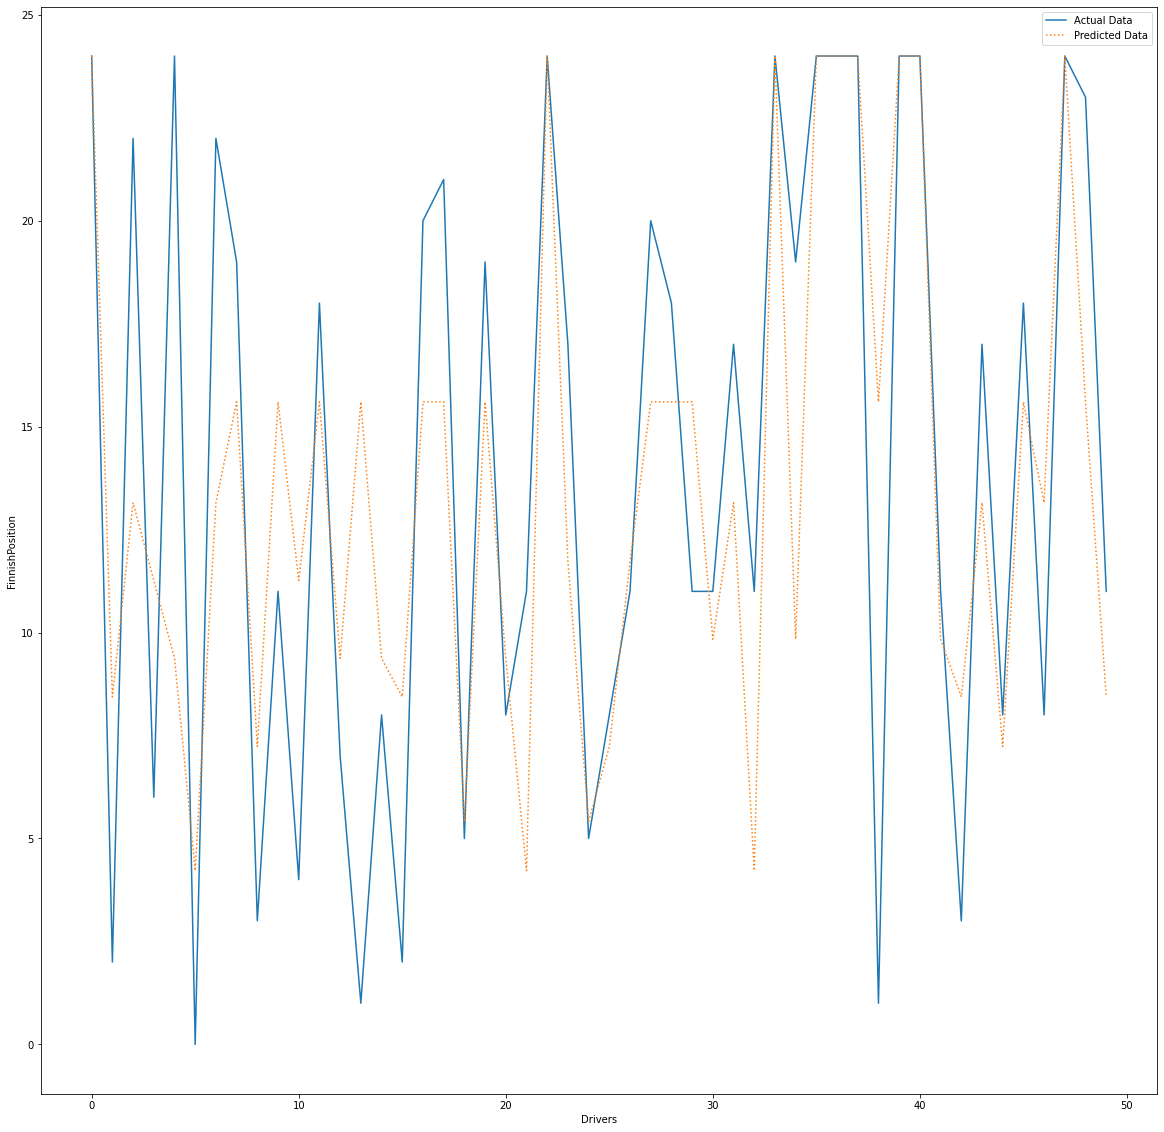

In [31]:
# visualising the first 50 rows of the data vs the predicted values

figGraph = plt.figure(figsize=(20, 20))

plt.plot([item for item in range(len(ytest[0:50]))], ytest.values[0:50], label="Actual Data")
plt.plot([item for item in range(len(ytest[0:50]))], y_pred_tree[0:50], label="Predicted Data", linestyle=':')
plt.ylabel("FinnishPosition")
plt.xlabel("Drivers")
plt.legend(loc='best')
plt.show()


Het opslaan van de grafiek

In [32]:
# saving the graph as a png file

figGraph.savefig("./Figures/predictionVSreality_graph.png")


Het plotten van de tree

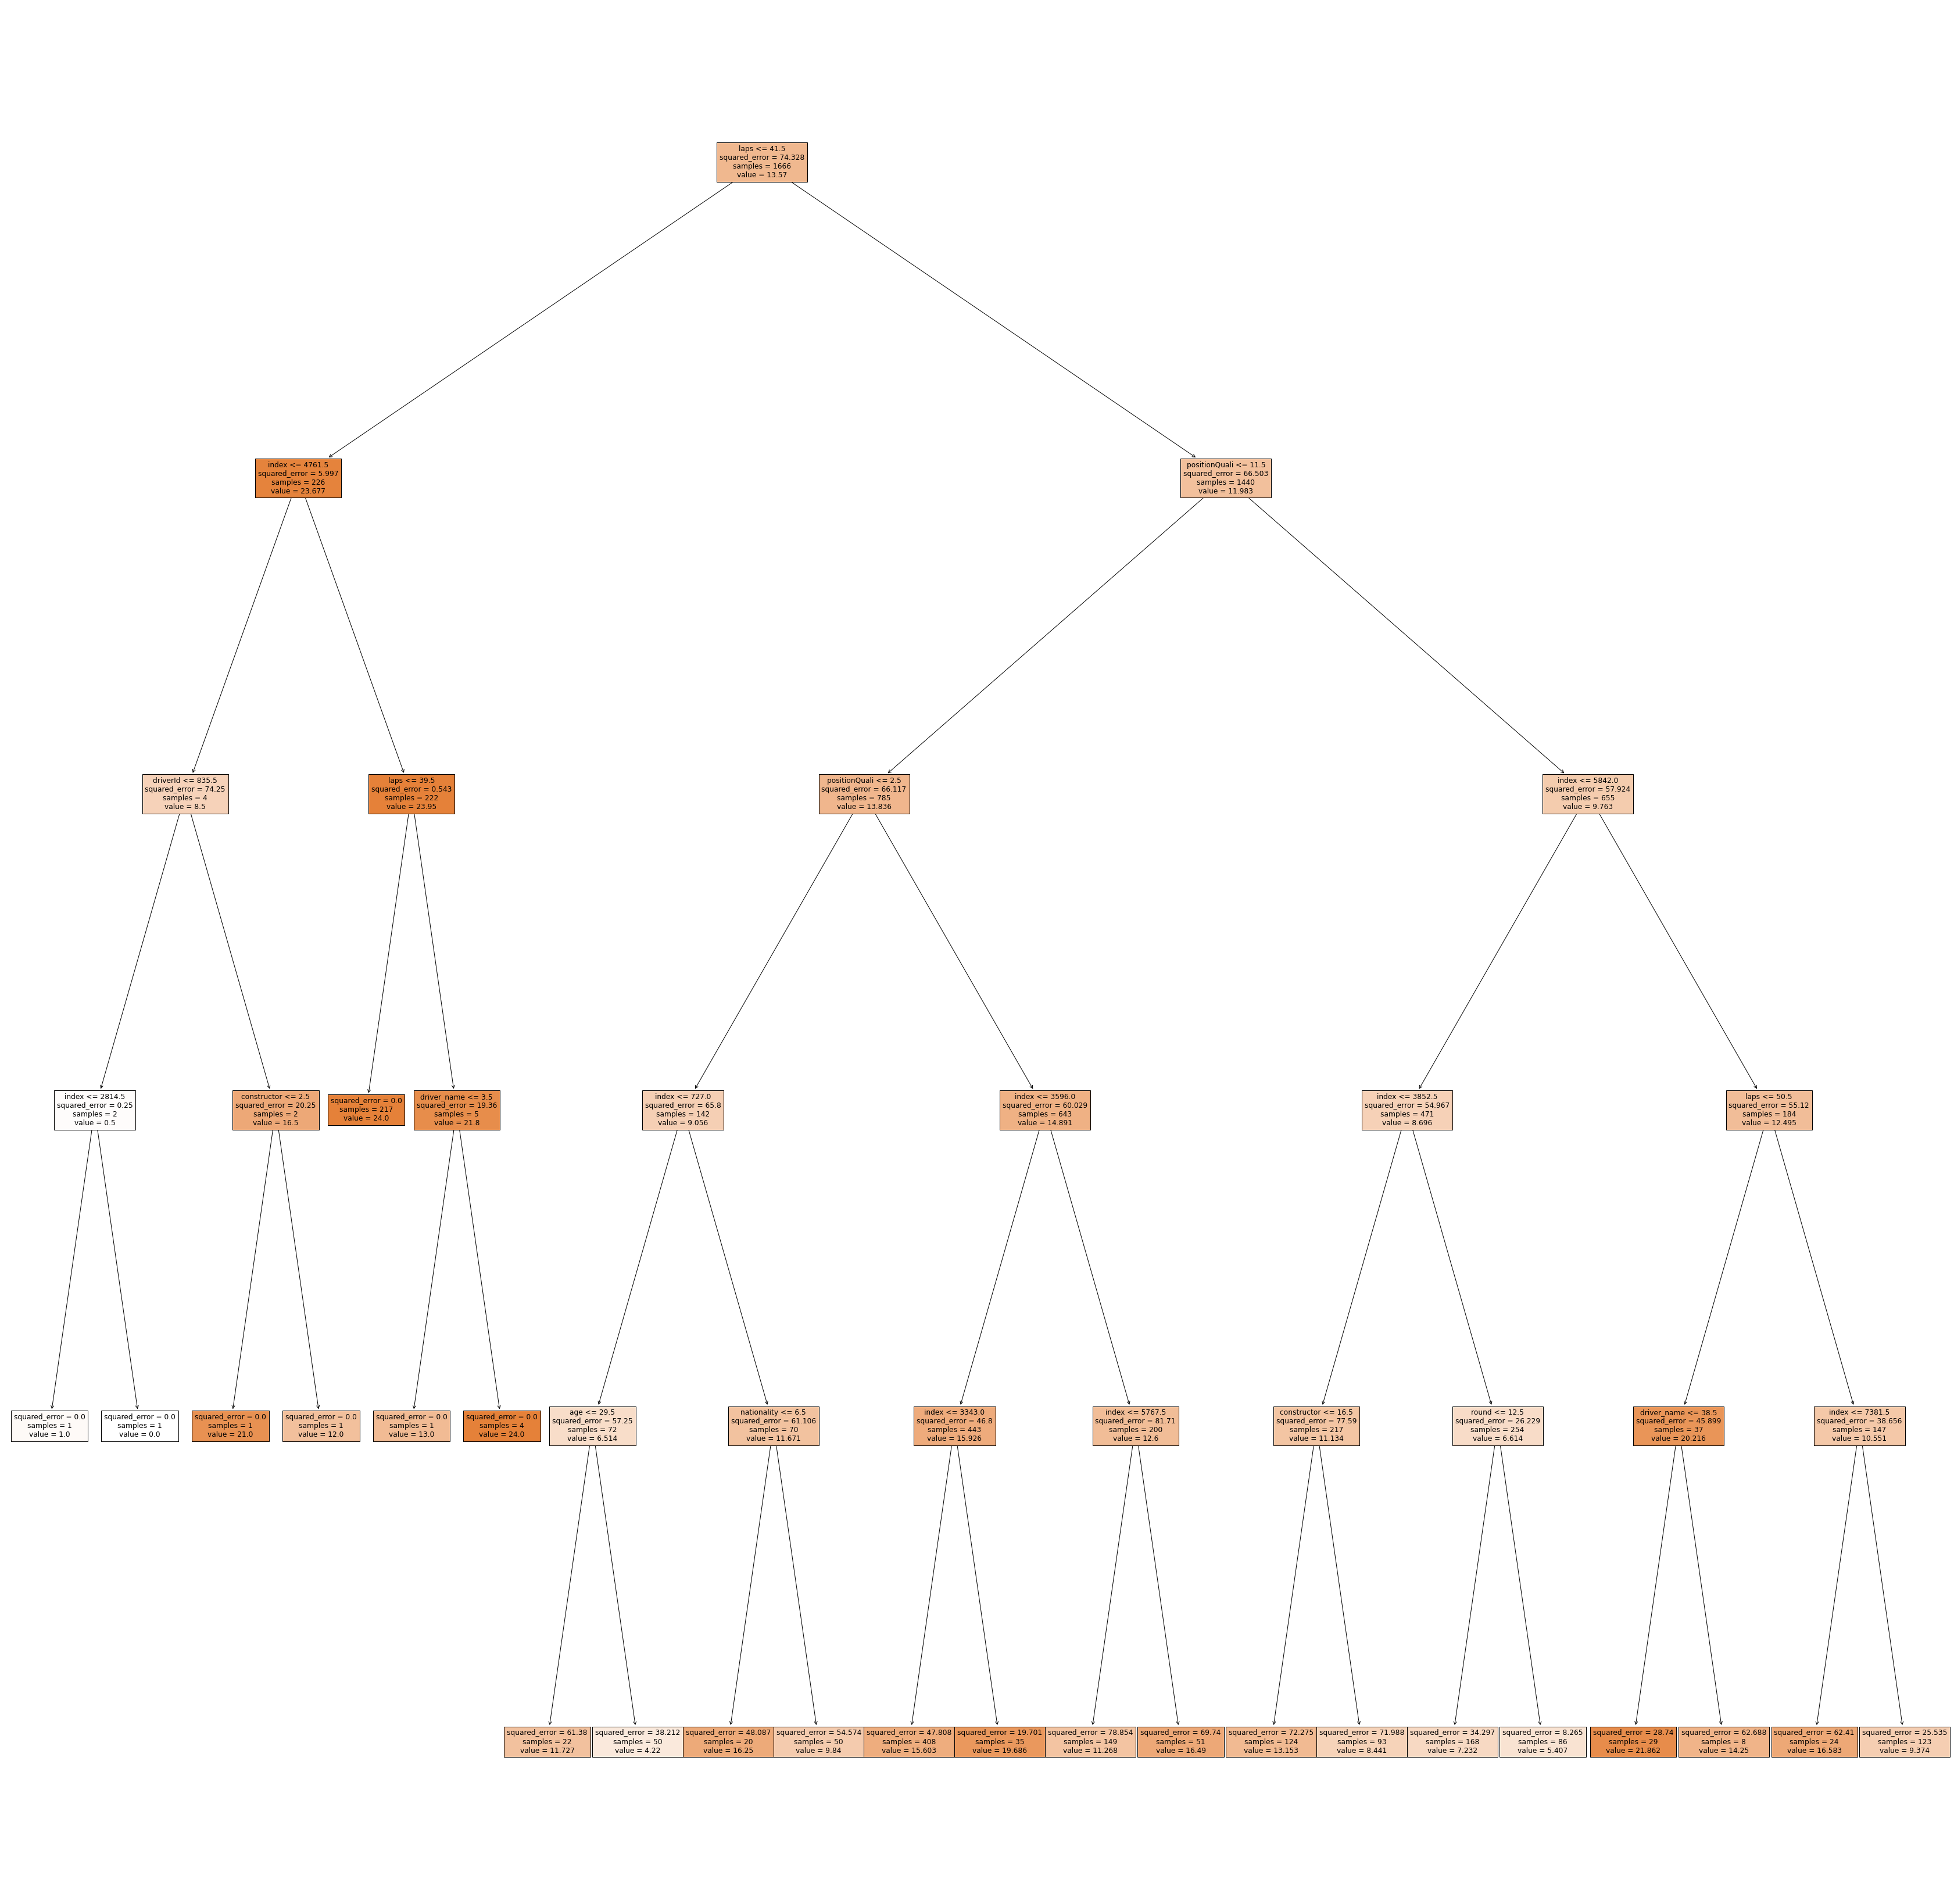

In [33]:
# creating the tree

treeFig = plt.figure(figsize=(60, 60))
_ = tree.plot_tree(model,
                   feature_names=list(X),
                   filled=True)


Het opslaan van de geplotte tree

In [34]:
# saving the plotted tree as a png file

treeFig.savefig("./Figures/decision_tree.png")
